In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder


In [64]:
df = pd.read_csv("BankChurners.csv")
df.columns[0]

'CLIENTNUM'

In [65]:
df.drop(df.columns[-2:], axis = 1, inplace= True)
df.drop(df.columns[0], axis =1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [66]:
df[['Attrition_Flag', 'Gender']]

,Attrition_Flag,Gender
0,Existing Customer,M
1,Existing Customer,F
2,Existing Customer,M
3,Existing Customer,F
4,Existing Customer,M
...,...,...
10122,Existing Customer,M
10123,Attrited Customer,M
10124,Attrited Customer,F
10125,Attrited Customer,M


In [67]:
#Encoding target
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

#Group and encode age feature
bins = [0, 36, 50, np.inf ]
agegr = ['<36', '36-50', '>50']
df['Age_group'] = pd.cut(df['Customer_Age'], bins, labels=agegr)

X = df[['Age_group', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']]
enc = OrdinalEncoder()
enc.fit_transform(X)



array([[0., 1., 3., 1., 2., 0.],
       [0., 0., 2., 2., 4., 0.],
       [2., 1., 2., 1., 3., 0.],
       ...,
       [0., 0., 3., 1., 4., 0.],
       [1., 1., 2., 3., 1., 0.],
       [0., 0., 2., 1., 4., 3.]])

In [63]:
X.head()

,Age_group,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,36-50,M,High School,Married,$60K - $80K,Blue
1,36-50,F,Graduate,Single,Less than $40K,Blue
2,>50,M,Graduate,Married,$80K - $120K,Blue
3,36-50,F,High School,Unknown,Less than $40K,Blue
4,36-50,M,Uneducated,Married,$60K - $80K,Blue


<BarContainer object of 4 artists>

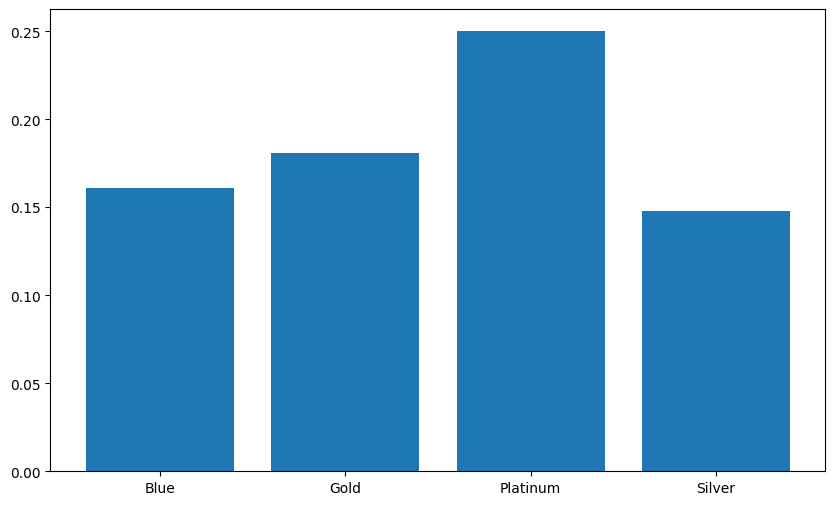

In [52]:
churn_rate = df.groupby(['Card_Category'])['Attrition_Flag'].mean()
plt.figure(figsize= (10,6))
plt.bar(churn_rate.index, churn_rate.values)